In [7]:
import pandas as pd

In [8]:
stock = pd.read_csv('/Users/parkjuyong/Desktop/4-1/Data Crawling/practice/week11/14장_data/GOOG.csv')

In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    899 non-null    object 
 1   GOOG    899 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.2+ KB


In [10]:
stock.head()

,Date,GOOG
0,2021-01-04,85.824684
1,2021-01-05,86.454369
2,2021-01-06,86.174782
3,2021-01-07,88.755119
4,2021-01-08,89.746338


In [11]:
stock.columns = ['ds','y']

In [12]:
stock.head()

,ds,y
0,2021-01-04,85.824684
1,2021-01-05,86.454369
2,2021-01-06,86.174782
3,2021-01-07,88.755119
4,2021-01-08,89.746338


In [13]:
from prophet import Prophet

In [14]:
!pip install prophet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
Pp_stock = Prophet()

In [16]:
Pp_stock.fit(stock)

11:21:46 - cmdstanpy - INFO - Chain [1] start processing
11:21:46 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future_ds = Pp_stock.make_future_dataframe(periods=100)
future_ds.tail()

,ds
994,2024-11-04
995,2024-11-05
996,2024-11-06
997,2024-11-07
998,2024-11-08


In [18]:
future_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      999 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [19]:
future_y = Pp_stock.predict(future_ds)
future_y[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
994,2024-11-04,194.854204,187.535560,202.493257
995,2024-11-05,195.011341,187.482765,202.278057
996,2024-11-06,195.264457,187.867966,202.675118
997,2024-11-07,195.619950,188.042457,202.875468
998,2024-11-08,196.059589,187.975501,203.743401


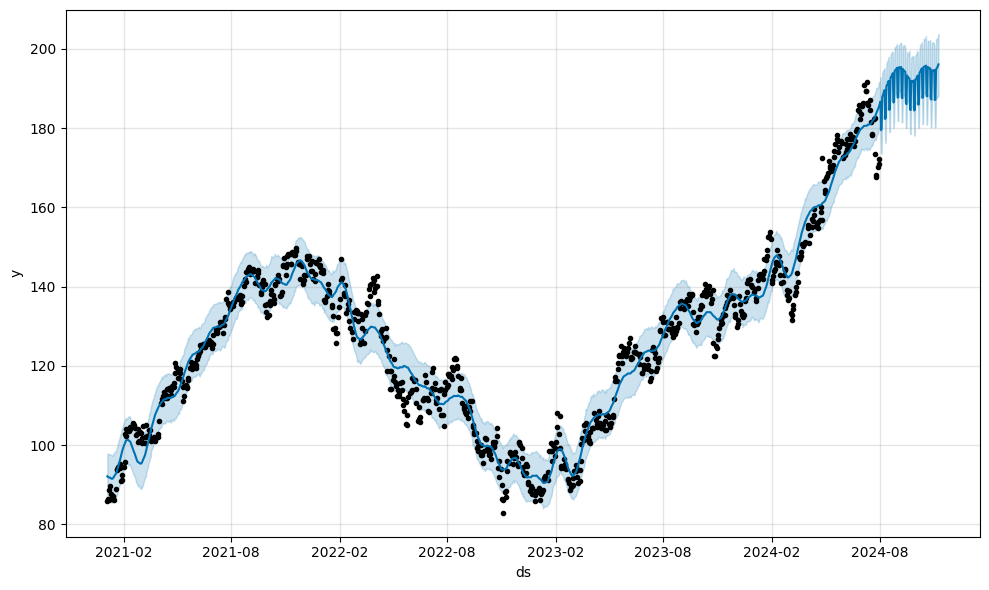

In [20]:
fig_trend = Pp_stock.plot(future_y)

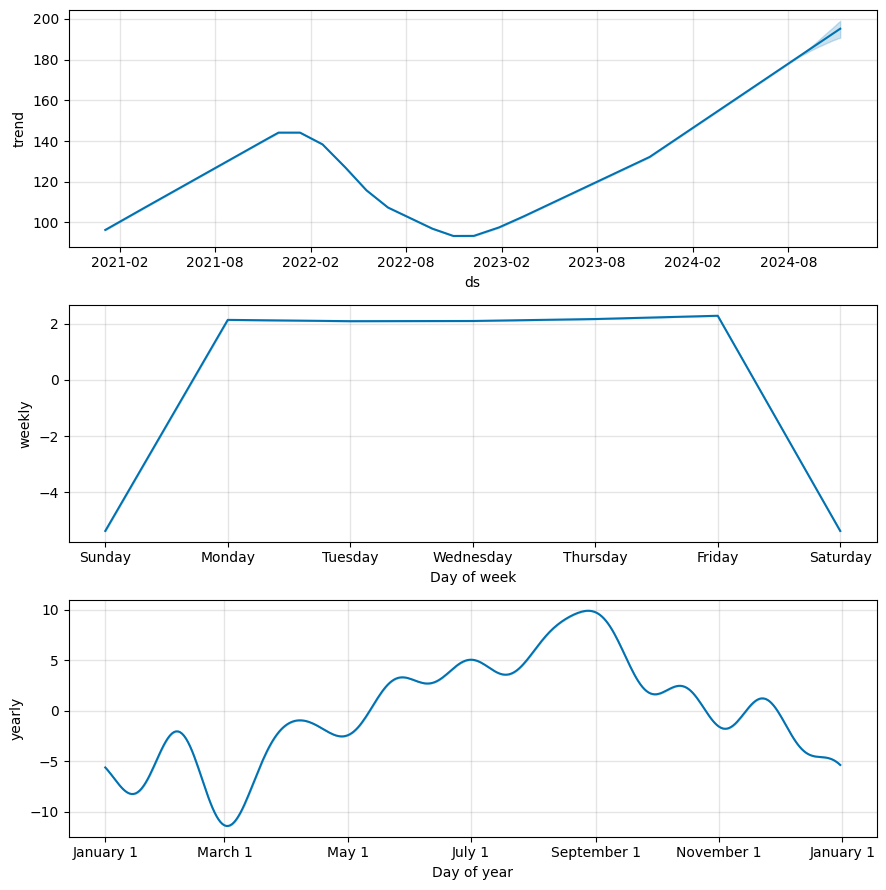

In [21]:
fig_components = Pp_stock.plot_components(future_y)

In [22]:
from prophet.plot import add_changepoints_to_plot

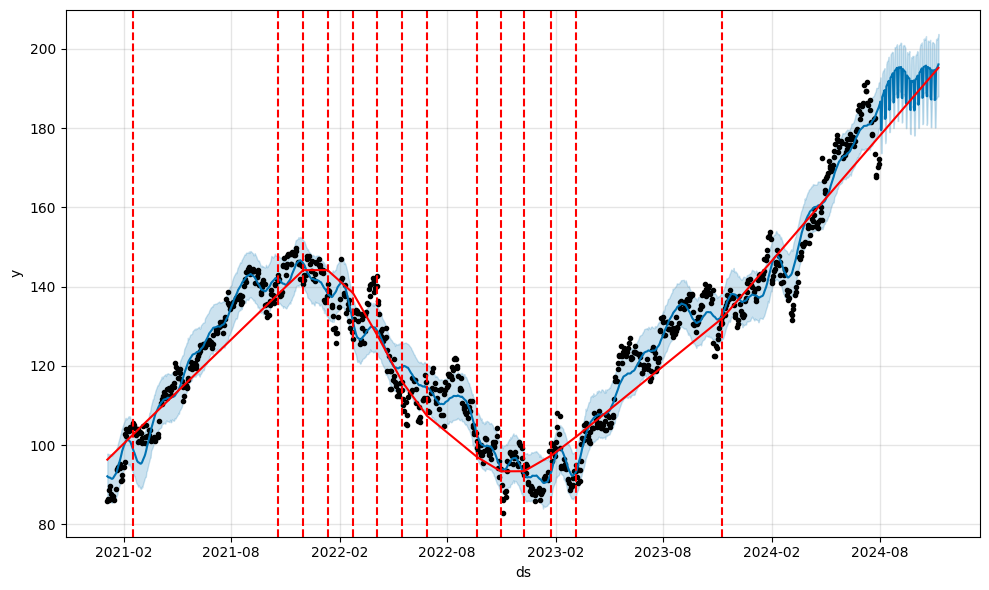

In [23]:
fig_trend = Pp_stock.plot(future_y)
fig_trend_changepoints = add_changepoints_to_plot(fig_trend.gca(), Pp_stock, future_y)

In [24]:
!pip install plotly


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [25]:
import plotly.graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly

In [26]:
plot_plotly(Pp_stock, future_y)

In [27]:
plot_components_plotly(Pp_stock, future_y)